### 2주차에 했던 데이터 전처리, 5가지 모델 사용해보기(추가로 confusion matrix까지)

In [1]:
# 1. 결측치 확인

import pandas as pd

# 데이터 불러오기

# 컬럼 이름이 없는 경우는 이렇게 추가해 줄 수 있음
# [구매 가격, 유지비, 문 개수, 탑승 가능 인원, 트렁크 크기, 안전도, 평가 결과(분류)]
column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
df = pd.read_csv("../car_evaluation.csv", names=column_names)

# df = pd.read_csv("../car_evaluation.csv", header=None) # 이렇게 할 수도 있음. 이렇게 하면 컬럼명(헤드)이 없다는 뜻. 알아서 1~7로 컬럼명을 넣어 줌

# 결측치 확인
print(df.isnull().sum()) # null인 칸 개수 반환

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


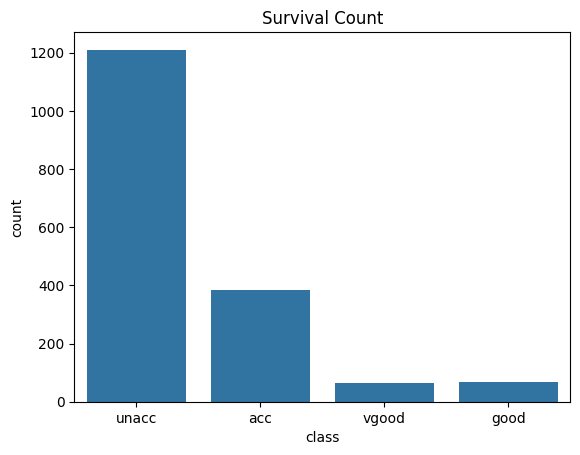

In [2]:
# 2. 레이블 불균형(imbalanced data) 확인

print(df['class'].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['class'])
plt.title("Survival Count")
plt.show()

In [ ]:
# **인코딩 전: 열의 각 값의 개수 확인(이 개수를 알아둬야 인코딩 후 어떤 숫자가 어떤 값을 가리키는지 알 수 있음. but 이 데이터에서는 레이블 빼고 값 개수가 다 같아서 알 수 없음...)
print(df['buying'].value_counts())
print(df['maint'].value_counts())
print(df['doors'].value_counts())
print(df['persons'].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64


In [4]:
print(df['lug_boot'].value_counts())
print(df['safety'].value_counts())
print(df['class'].value_counts())

lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [5]:
# 3. 인코딩(숫자가 아닌 데이터를 숫자로 변환)
# 인코딩을 하는 이유: 일반적인 AI 모델은 숫자만 다룰 수 있기 때문!

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['buying'] = encoder.fit_transform(df['buying'])
df['maint'] = encoder.fit_transform(df['maint'])
df['doors'] = encoder.fit_transform(df['doors'])
df['persons'] = encoder.fit_transform(df['persons'])
df['lug_boot'] = encoder.fit_transform(df['lug_boot'])
df['safety'] = encoder.fit_transform(df['safety'])
df['class'] = encoder.fit_transform(df['class'])


# 변환 후 확인
print(df['buying'].value_counts())
print(df['maint'].value_counts())
print(df['doors'].value_counts())
print(df['persons'].value_counts())
print(df['lug_boot'].value_counts())
print(df['safety'].value_counts())
print(df['class'].value_counts())
print(df.head()) # 표 윗부분 확인

buying
3    432
0    432
2    432
1    432
Name: count, dtype: int64
maint
3    432
0    432
2    432
1    432
Name: count, dtype: int64
doors
0    432
1    432
2    432
3    432
Name: count, dtype: int64
persons
0    576
1    576
2    576
Name: count, dtype: int64
lug_boot
2    576
1    576
0    576
Name: count, dtype: int64
safety
1    576
2    576
0    576
Name: count, dtype: int64
class
2    1210
0     384
1      69
3      65
Name: count, dtype: int64
   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2


In [ ]:
# 4. 만든 데이터로 모델 학습

from sklearn.model_selection import train_test_split  # 데이터 분할 함수
from sklearn.metrics import accuracy_score  # 정확도 평가 함수
from sklearn.preprocessing import StandardScaler  # 데이터 표준화 함수

# [데이터 제작]
X = df.drop(columns=["class"])
y = df["class"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # test_size: 전체 데이터 중 test에 할당할 비율


# [DT 모델]
from sklearn.tree import DecisionTreeClassifier

# 모델 생성, 훈련
dt_model = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=3, max_depth=3, random_state=42)
    # **max_depth=3: 트리의 최대 깊이를 3으로 제한. 깊이가 줄어든 만큼 조건을 덜 체크하므로 정확도 하락 but 과적합 감소
    # **min_samples_spilt=5: 한 노드에서 샘플이 최소 5개여야만 다음 노드로 넘어감(= 샘플을 나눔). 정확도 하락 but 과적합 감소
    # **min_samples_leaf=2: 최하단 노드(잎)는 샘플이 최소 2개 있어야 함. 샘플을 너무 작게 나누는 걸 방지해 정확도 하락 but 과적합 감소
dt_model.fit(X_train, y_train)

# 모델 예측, 평가
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"DT 테스트 정확도: {accuracy:.2f}")


# [RF 모델]
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=42)
    # n_estimators=100: DT 모델을 100개 사용. 많으면 성능 향상 but 계산량 증가
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"RF 테스트 정확도: {accuracy:.2f}")


# [SVM 모델]
from sklearn.svm import SVC

svm_model = SVC(kernel="rbf", C=10, random_state=42)
    # C: 마진. C가 작을수록 마진이 커지고, 마진이 클수록 훈련 데이터에 맞아져 과적합 가능성 증가
    # kernel="linear": 커널 종류가 선형. 자료들을 나누는 구분선 형태를 선형/비선형(곡선 등) 등에서 하나를 선택하는 것. rbf, poly, sigmoid 등 다양함.

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"SVM 테스트 정확도: {accuracy:.2f}")


# [LR 모델]
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs')
    # multi_class='ovr': 다중 분류 (One-vs-Rest)
    # 현재 multi_class='ovr'을 넣으면 경고가 발생해서 제거해 둠
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"LR 테스트 정확도: {accuracy:.2f}")


# [KNN 모델]
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)  # k=5로 설정
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN 테스트 정확도: {accuracy:.2f}")


print()


# [외전. 교차 검증]
from sklearn.model_selection import cross_val_score
dt_scores = cross_val_score(dt_model, X, y, cv=5)  # **K 폴드 교차검증: test 데이터가 아닌 전체 데이터를 cv개의 폴드로 나눠 각 폴드마다 테스트
print(f"DT 교차 검증 평균 정확도: {dt_scores.mean():.2f}")

rf_scores = cross_val_score(rf_model, X, y, cv=5)  # **K 폴드 교차검증: test 데이터가 아닌 전체 데이터를 cv개의 폴드로 나눠 각 폴드마다 테스트
print(f"RF 교차 검증 평균 정확도: {rf_scores.mean():.2f}")

svm_scores = cross_val_score(svm_model, X, y, cv=5)  # **K 폴드 교차검증: test 데이터가 아닌 전체 데이터를 cv개의 폴드로 나눠 각 폴드마다 테스트
print(f"SVM 교차 검증 평균 정확도: {svm_scores.mean():.2f}")

lr_scores = cross_val_score(lr_model, X, y, cv=5)  # **K 폴드 교차검증: test 데이터가 아닌 전체 데이터를 cv개의 폴드로 나눠 각 폴드마다 테스트
print(f"LR 교차 검증 평균 정확도: {lr_scores.mean():.2f}")

knn_scores = cross_val_score(knn_model, X, y, cv=5)  # **K 폴드 교차검증: test 데이터가 아닌 전체 데이터를 cv개의 폴드로 나눠 각 폴드마다 테스트
print(f"KNN 교차 검증 평균 정확도: {knn_scores.mean():.2f}")


DT 테스트 정확도: 0.74
RF 테스트 정확도: 0.75
SVM 테스트 정확도: 0.98
LR 테스트 정확도: 0.66
KNN 테스트 정확도: 0.93

DT 교차 검증 평균 정확도: 0.71
RF 교차 검증 평균 정확도: 0.75
SVM 교차 검증 평균 정확도: 0.88
LR 교차 검증 평균 정확도: 0.65
KNN 교차 검증 평균 정확도: 0.78


#### 학습 결과로 Confusion Matrix 만들기
자세한 설명은 w2_titanicDT.ipynb에서


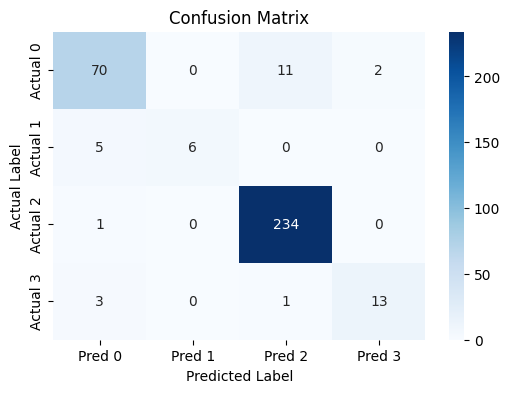

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        83
           1       1.00      0.55      0.71        11
           2       0.95      1.00      0.97       235
           3       0.87      0.76      0.81        17

    accuracy                           0.93       346
   macro avg       0.93      0.79      0.84       346
weighted avg       0.93      0.93      0.93       346



In [17]:
# 7. Confusion Matrix 만들기(여기선 마지막으로 입력된, knn 모델이 반환한 y_pred 값을 사용한 예)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 예측값과 실제값 비교
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1", "Pred 2", "Pred 3"], yticklabels=["Actual 0", "Actual 1", "Actual 2", "Actual 3"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

# 정밀도, 재현율, F1-score 출력
print(classification_report(y_test, y_pred))